In [1]:
import pandas as pd
from pandas.tseries.offsets import BDay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

# Příprava dat

In [2]:
raw_data = pd.read_csv("CLN20.NYM.csv")
data1 = raw_data.set_index(raw_data.columns[0])

contract_raw = data1.iloc[:,3]
contract_raw = contract_raw["2019-05-06":]#"2020-02-01"]
contract_raw.index = pd.to_datetime(contract_raw.index)
contract_raw = contract_raw.asfreq(BDay())
contract_raw = contract_raw.fillna(method='ffill').dropna()
contract_raw.tail()

pct_ch = contract_raw.pct_change()
contract = pd.DataFrame({"contract":contract_raw,"%change":pct_ch}, index=contract_raw.index).dropna()
contract["logreturn"] = np.log(contract_raw/contract_raw.shift(1))
contract["delta"] = contract_raw - contract_raw.shift(1)
contract["shifted_contract"] = contract_raw.shift()

contract.tail()

,contract,%change,logreturn,delta,shifted_contract
Date,,,,,
2020-04-03,33.000000,0.133242,0.125082,3.879999,29.120001
2020-04-06,32.799999,-0.006061,-0.006079,-0.200001,33.000000
2020-04-07,32.040001,-0.023171,-0.023443,-0.759998,32.799999
2020-04-08,33.470001,0.044632,0.043664,1.430000,32.040001
2020-04-09,32.029999,-0.043024,-0.043977,-1.440002,33.470001


### Grafy k červencovému kontraktu

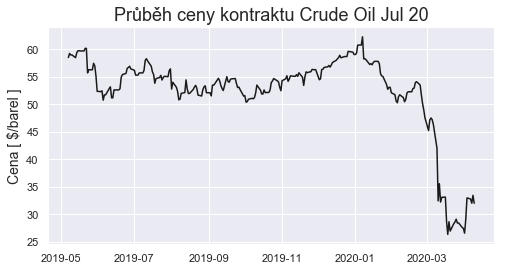

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(contract.iloc[:,0], c="k")
ax.set_title("Průběh ceny kontraktu Crude Oil Jul 20", fontsize=18)
ax.set_ylabel("Cena [ $/barel ]",fontsize=14)
fig.savefig('CLN20.NYM_prices.pdf', format='pdf', bbox_inches='tight')

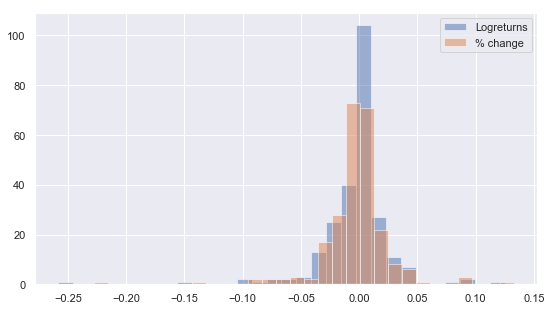

In [4]:
plt.figure(figsize=(9,5))
plt.hist(contract["logreturn"],bins=30,alpha=0.5,label="Logreturns")
plt.hist(contract["%change"],bins=30,alpha=0.5,label="% change")
#plt.hist(contract["delta"],bins=30,alpha=0.5,label="delta")
plt.legend()
plt.show()

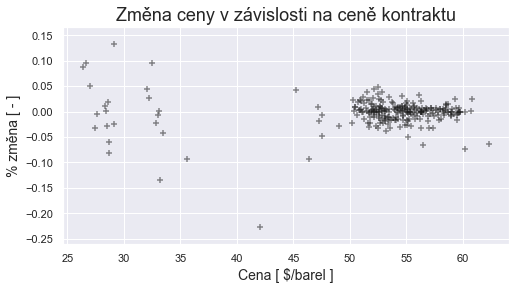

In [5]:

fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Změna ceny v závislosti na ceně kontraktu", fontsize=18)
ax.scatter(contract["shifted_contract"], contract["%change"], c="k", marker="+", alpha=0.5)
ax.set_ylabel("% změna [ - ]",fontsize=14)
ax.set_xlabel("Cena [ $/barel ]",fontsize=14)
fig.savefig('CLN20.NYM_scatter.pdf', format='pdf', bbox_inches='tight')

### Grafy k srpnovému kontraktu 
(použije se u calendar spread opce, následující grafy jsou i v textu diplomové práce)

In [6]:
raw_data2 = pd.read_csv("CLQ20.NYM.csv")
data2 = raw_data2.set_index(raw_data2.columns[0])

contract_raw2 = data2.iloc[:,3]
contract_raw2 = contract_raw2["2019-07-29":]#"2020-02-01"]
contract_raw2.index = pd.to_datetime(contract_raw2.index)
contract_raw2 = contract_raw2.asfreq(BDay())
contract_raw2 = contract_raw2.fillna(method='ffill').dropna()
contract_raw2.tail()

pct_ch2 = contract_raw2.pct_change()
contract2 = pd.DataFrame({"contract":contract_raw2,"%change":pct_ch2}, index=contract_raw2.index).dropna()
contract2["logreturn"] = np.log(contract_raw2/contract_raw2.shift(1))
contract2["delta"] = contract_raw2 - contract_raw2.shift(1)
contract2["shifted_contract"] = contract_raw2.shift()

contract2.tail()

,contract,%change,logreturn,delta,shifted_contract
Date,,,,,
2020-04-03,33.599998,0.119627,0.112995,3.589998,30.010000
2020-04-06,33.750000,0.004464,0.004454,0.150002,33.599998
2020-04-07,32.930000,-0.024296,-0.024596,-0.820000,33.750000
2020-04-08,34.320000,0.042211,0.041344,1.390000,32.930000
2020-04-09,33.270000,-0.030594,-0.031072,-1.050000,34.320000


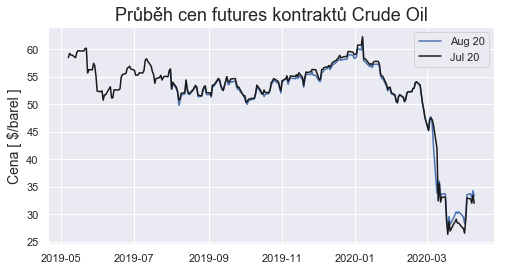

In [7]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(contract2.iloc[:,0], c="b", label="Aug 20")
ax.plot(contract.iloc[:,0], c="k", label="Jul 20")
ax.set_title("Průběh cen futures kontraktů Crude Oil", fontsize=18)
ax.set_ylabel("Cena [ $/barel ]",fontsize=14)
ax.legend()
fig.savefig('CLQ20.NYM_prices.pdf', format='pdf', bbox_inches='tight')

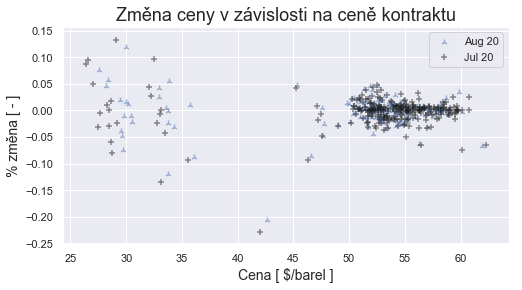

In [8]:

fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Změna ceny v závislosti na ceně kontraktu", fontsize=18)
ax.scatter(contract2["shifted_contract"], contract2["%change"], c="b", marker="2", alpha=0.5, label="Aug 20")
ax.scatter(contract["shifted_contract"], contract["%change"], c="k", marker="+", alpha=0.5, label="Jul 20")
ax.set_ylabel("% změna [ - ]",fontsize=14)
ax.set_xlabel("Cena [ $/barel ]",fontsize=14)
ax.legend()
fig.savefig('CLQ20.NYM_scatter.pdf', format='pdf', bbox_inches='tight')

# Asijská opce simulační výpočet

Rozdělit Jul 20 dataset na 2 podle ceny  
Hodnotu $45 jsem určil podle osy y v předchozím grafu, změna nepřesahuje nad touto cenou hodnoty +-0.05, pod touto cenou je rozptyl dat výrazně větší.

In [9]:
contract_low = contract[contract["shifted_contract"]<45]
contract_high = contract[contract["shifted_contract"]>=45]

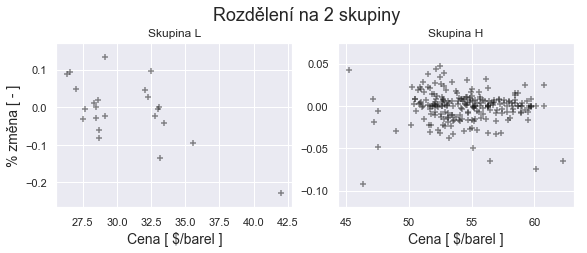

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
fig.tight_layout()
fig.suptitle('Rozdělení na 2 skupiny', fontsize=18, y=1.08)
ax1.scatter(contract_low["shifted_contract"], contract_low["%change"],c="k", marker="+", alpha=0.5)
ax1.set_title("Skupina L")
ax1.set_xlabel("Cena [ $/barel ]",fontsize=14)
ax1.set_ylabel("% změna [ - ]",fontsize=14)
ax2.scatter(contract_high["shifted_contract"], contract_high["%change"],c="k", marker="+", alpha=0.5)
ax2.set_xlabel("Cena [ $/barel ]",fontsize=14)
ax2.set_title("Skupina H")
fig.savefig('CLN20.NYM_scatter_separated.pdf', format='pdf', bbox_inches='tight')

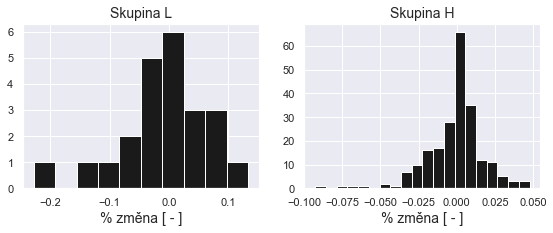

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))
fig.tight_layout()
ax1.hist(contract_low["%change"], color="k", bins=10)
ax1.set_title("Skupina L", fontsize=14)
ax1.set_xlabel("% změna [ - ]",fontsize=14)
ax2.hist(contract_high["%change"], color="k", bins=20)
ax2.set_title("Skupina H",fontsize=14)
ax2.set_xlabel("% změna [ - ]",fontsize=14)
fig.savefig('CLN20.NYM_hist_separated.pdf', format='pdf', bbox_inches='tight')

### Testy pro obě skupiny (L a H) pro určení nejvhodnějšího rozdělení

In [12]:
from statsmodels.stats.stattools import jarque_bera
j1 = jarque_bera(contract_low["%change"])


In [13]:
j2 = jarque_bera(contract_high["%change"])

In [14]:
pd.DataFrame({"Skupina L":j1,"Skupina H":j2}, index=["JB hodnota","p hodnota", "šikmost", "špičatost"])

,Skupina L,Skupina H
JB hodnota,2.493166,1.822829e+02
p hodnota,0.287486,2.616739e-40
šikmost,-0.664282,-1.041732e+00
špičatost,3.914593,6.942663e+00


In [15]:
from auxiliary.distribution_fit import distribution_fit

par22 = distribution_fit(contract_low["%change"])
par22

Parameters are in this format: (location, scale)
(-0.00850834558259247, 0.07839784446981839)
(4.717589261734743, -0.003983628160547519, 0.06150391113051528)
(-0.005820147374468683, 0.037545965376334096)
(-0.005788838732412478, 0.057315533073899395)

The larger the p-value, the better
Normal:  0.8878521795740859
Student t KstestResult(statistic=0.07679156602945725, pvalue=0.9992369909980124)
Cauchy:  KstestResult(statistic=0.08394050817375953, pvalue=0.9969231900059073)
Laplace:  KstestResult(statistic=0.07588674542805396, pvalue=0.9993792561363484)
TE  [-0.00850834558259247, 0.07839784446981839, 0.8878521795740859]


,Normal,T,Cauchy,Laplace
Loc,-0.008508,-0.003984,-0.005820,-0.005789
Scale,0.078398,0.061504,0.037546,0.057316
p (KSTest),0.887852,0.999237,0.996923,0.999379


In [16]:
import scipy.stats as sps
t_params = sps.t.fit(contract_low["%change"])
t_params

(4.717589261734743, -0.003983628160547519, 0.06150391113051528)

In [17]:

par1 = distribution_fit(contract_high["%change"])

Parameters are in this format: (location, scale)
(-0.001401407873528166, 0.018629658618893753)
(2.4785399957643266, 0.0003720039904021345, 0.010940615439959837)
(0.0011959834769368174, 0.007358790125346638)
(6.176682183349208e-08, 0.012553454584788994)

The larger the p-value, the better
Normal:  0.0017352390351645678
Student t KstestResult(statistic=0.07862012176486433, pvalue=0.12492696937955577)
Cauchy:  KstestResult(statistic=0.07445274296722271, pvalue=0.16594435729054657)
Laplace:  KstestResult(statistic=0.09090663076278371, pvalue=0.04945128985467898)
TE  [-0.001401407873528166, 0.018629658618893753, 0.0017352390351645678]


In [18]:
par1

,Normal,T,Cauchy,Laplace
Loc,-0.001401,0.000372,0.001196,6.176682e-08
Scale,0.018630,0.010941,0.007359,1.255345e-02
p (KSTest),0.001735,0.124927,0.165944,4.945129e-02


### Výpočet pracovních dnů  

Výpočet pro celkový počet pracovních dnů do expirace a počet dnů, ve kterých dochází k průměrování.

Hodnoty pro kontrakty se stahují ze stránek CME, takže po datu expirace May 2020 kontraktu se už nebudou ukazovat.

Settlement date pro May 2020 asijskou opci je 2020-05-29, **pokud už je po tomto datu, musí se asian_may_20_settle datum přiřadit manuálně** ( takhle bude datum jako string, pro převedení do datetime se musí použít pd.to_datetime https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html )

In [19]:
from auxiliary.ContractCalendar import ContractCalendar

asian_cal = ContractCalendar.wti_average_option()
asian_cal.calendar

,Contract Month,Product Code,First Trade,Last Trade,Settlement
0,April 2020 WTI Average Price Option,AOJ20,2012-01-03,2020-04-30,2020-04-30
1,May 2020 WTI Average Price Option,AOK20,2012-01-03,2020-05-29,2020-05-29
2,June 2020 WTI Average Price Option,AOM20,2012-01-03,2020-06-30,2020-06-30
3,July 2020 WTI Average Price Option,AON20,2012-01-03,2020-07-31,2020-07-31
4,August 2020 WTI Average Price Option,AOQ20,2012-01-03,2020-08-31,2020-08-31
...,...,...,...,...,...
100,August 2028 WTI Average Price Option,AOQ28,2020-01-02,2028-08-31,2028-08-31
101,September 2028 WTI Average Price Option,AOU28,2020-01-02,2028-09-29,2028-09-29
102,October 2028 WTI Average Price Option,AOV28,2020-01-02,2028-10-31,2028-10-31
103,November 2028 WTI Average Price Option,AOX28,2020-01-02,2028-11-30,2028-11-30


In [20]:
asian_may_20 = asian_cal.calendar[asian_cal.calendar["Contract Month"]=="May 2020 WTI Average Price Option"]
asian_may_20_settle = asian_may_20.iloc[0,-1]
print(asian_may_20_settle)

2020-05-29 00:00:00


In [21]:
averaging_days = ContractCalendar.get_business_days_in_month(end_of_month=asian_may_20_settle)
print(averaging_days)
print(len(averaging_days))

DatetimeIndex(['2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29'],
              dtype='datetime64[ns]', freq='B')
21


První datum v all_days je poslední datum, pro které jsou známy hodnoty, kroků je tedy o jeden méně

In [22]:
all_days = ContractCalendar.get_business_days(start=contract.index[-1],end=asian_may_20_settle)
print(all_days)
print(len(all_days))

DatetimeIndex(['2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29'],
              dtype='datetime64[ns]', freq='B')
37


### Simulační výpočet
Funkce asian_simulation_gbm_final je dostupná v souboru simulations.py ve složce simulations

In [23]:
from simulations.simulations import asian_simulation_gbm_final

pos = "p"
init_price = contract.iloc[-1,0]
strike = 50
sim = 10000
steps = len(all_days)-1
avg_steps=len(averaging_days)
avg_values=[]
group1 = (-0.008508,0.078398,"n")
group2 = (0.000372,0.010941,2.4785399,"t") # t
#group2 = (0.001196,0.007359,"c")# cauchy
border_price = 45

np.random.seed(19121995)

total,paths, payoffs = asian_simulation_gbm_final(position_flag=pos,initial_price=init_price, strike=strike, simulations=sim, steps=steps,
                                avg_steps=avg_steps , avg_values=avg_values, group1=group1, group2=group2,
                                 border_price=border_price, strike_type="fixed")
    
print(total)

239161.23002349565


Výpočet diskontované hodnoty

In [24]:
maturity = (len(all_days)-1)/252

In [25]:
discount_rate = 0.01

In [26]:
import numpy as np
(np.exp(-discount_rate*maturity)/sim)*total

23.881981504936448

Vykreslení grafu prvních 100 simulací

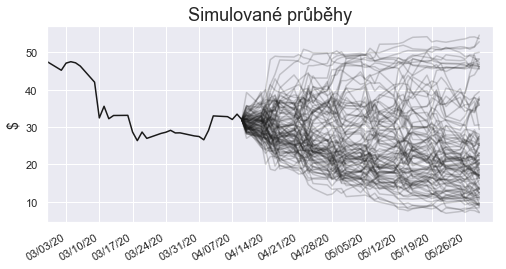

In [27]:
import matplotlib.dates as mdates

week = mdates.WeekdayLocator()
fmt = mdates.DateFormatter('%D')

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.set_title("Simulované průběhy", fontsize=18)
ax.plot(contract.iloc[-30:,0],color="k")
for path in paths[:100]:
    ax.plot(all_days, path, color="k", alpha=0.2)
ax.set_ylabel("$",fontsize=14)
ax.xaxis.set_major_locator(week)
ax.xaxis.set_major_formatter(fmt)
ax.set_xlim(contract.index[-30], all_days[-1]+BDay())
fig.autofmt_xdate()
plt.show()
fig.savefig('sim_asian.pdf', format='pdf', bbox_inches='tight')

Příprava parametrů pro vzorec, dostupný v CD u knihy The Complete Guide To Option Pricing Formulas

In [28]:
# value for volatility of entrire dataset
sigma = contract.iloc[:,1].std()

time_to_avg = (steps - avg_steps)/252

params = pd.DataFrame(
                        {"Params":[init_price,0, strike,time_to_avg, maturity, avg_steps, 0, discount_rate * 100, (sigma * np.sqrt(252) * 100)]},
                        index=["S","SA","X","t","Maturity","n","m","r","sigma"]
                        )
params

,Params
S,32.029999
SA,0.000000
X,50.000000
t,0.059524
Maturity,0.142857
n,21.000000
m,0.000000
r,1.000000
sigma,47.729342


### Výpočet konfidenčního intervalu

In [29]:
s = pd.Series(payoffs)

In [30]:
s.std()

10.336510211626345

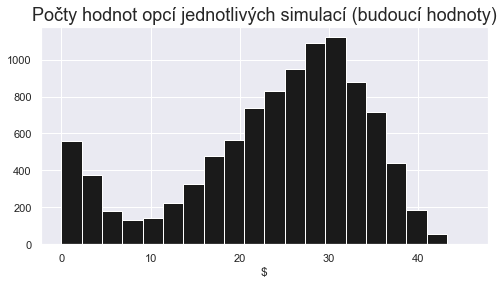

In [31]:
plt.figure(figsize=(8, 4))
plt.title("Počty hodnot opcí jednotlivých simulací (budoucí hodnoty)", fontsize=18)
plt.xlabel("$")
plt.hist(s, bins=20, color="k")
plt.plot()
plt.savefig('sim_asian_payoffs.pdf', format='pdf', bbox_inches='tight')

In [32]:
se = s.std()/np.sqrt(sim)
se

0.10336510211626346

Miscellaneous

In [33]:
time_to_avg

0.05952380952380952

In [34]:
steps - avg_steps

15